<a href="https://colab.research.google.com/github/kknoebel17/six_pic/blob/master/the_twelve_pack_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import basic libraries for analysis/orgaization
import os
import pandas as pd
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning to Identify Beer by Label - The Twelve Pack

Six-Pick is a phone app that will be able to classify a beer by its label, as well as provide information about the beer such as the brewery, ingredients, and flavor profile. This concept program, The Twelve Pack, will demonstrate the potential of the app by classifying pictures of twelve beers and connecting to the BreweryDB API to provide information about each beer.

This concept program will utilize SciKit Learn, Tensorflow and Keras for the machine learning model, as well as OpenCV for image manipulation. Furthermore, Matplotlib, Pandas and Numpy will provide the backbone of visulazation and data organization/exploration. A convolutional neural network (CNN) will be used to classify the beer labels.

500 pictures were taken of each beer an iPhone 8, 250 in full lighting and 250 in dark lighting. The photos were then uploaded to a [this](https://drive.google.com/drive/folders/1czEetrsebLZTNnlNEUbANq9uLmzynQAI) Google Drive folder. The iPhone saves photos in the HEIC format, so all pictures were converted to jpg using the Automator app on a 2018 Macbook Pro.

The reason this method was used to provide the data is that the Six-Pic app would run on pictures taken from a smart phone. The reason for the different lighting is that pictures used in the app will likely be taken outside in a well-lit environment, or in a bar/brewery in a poorly-lit environment.

In order to train the model effectively, altered images will be created from the original images for each beer using the Keras ImageDataGenerator. This method will save time during data collection (less pictures will need to be taken) and automate the image generation process.

## Types of Beer Used in Model and The Vessel

1) Stone Delicious IPA - Bottle

2) Allagash White Belgian Ale - Bottle

3) Alpine Duet - Bottle

4) Aurora Hoppyalis - Bottle

5) Ballast Point California Kolsch - Bottle

6) Bear Republic Racer 5 - Bottle

7) Sierra Nevada Pale Ale - Bottle

8) Green Flash West Coast IPA - Bottle

9) Lagunitas Secret Agenda - Bottle

10) Pizza Port Swami's IPA - Can

11) Coronado Mermaid's Republic - Can

12) Modern Times Orderville - Can

## Data Loading and Wrangling

The jpeg images will be loaded from the Google Drive folder, and labels created from the filenames of these images. The following code will mount this notebook to the drive. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following function will create a list of image paths.

In [0]:
# delcare path for image folder
base_path = '/content/drive/My Drive/beer_pictures/original_pics/'
# define function to get jpgs from path
def get_img(path):
    # create empty list to store jpgs
    all_jpgs = []
    for root, dirs, files in os.walk(path, topdown=True):
        for jpg in files:
            _, ext = os.path.splitext(jpg or jpeg)
            if ext == '.jpg':
                all_jpgs.append('/content/drive/My Drive/beer_pictures/original_pics/' + jpg)
            elif ext == '.jpeg':
                all_jpgs.append('/content/drive/My Drive/beer_pictures/original_pics/' + jpg)
    return all_jpgs
# call function to get jpgs
all_imgs = get_img(base_path)

The label names will be created from the filenames of each image in the drive. Below a function is defined to remove the numbers from each file name, and return a list of labels for each image. 

In [0]:
# define function to extract beer name from path names
def get_labels(path):
    path_list = []
    storage = []
    # iterate through jpeg files for generated images and extract beer names
    for root, dirs, files in os.walk(path, topdown=True):
        for file in files:
            path_list.append(file)
            parts = file.split('_')
            l = parts[0] + '_' + parts[1]
            storage.append(l)
    return storage 
# get labels from image names
labels = get_labels(base_path)

A pandas dataframe will be created from the image pathnames and the labels.

In [7]:
# create pandas frame from lists
df = pd.DataFrame({'images': all_imgs, 'labels': labels})
# shuffle rows to eliminate bias from image groupings
df = df.sample(frac=1)
# reindex dataframe 
df = df.reset_index()
df = df.drop(['index'], 1)
# show format
df.head()

,images,labels
0,/content/drive/My Drive/beer_pictures/original...,alpine_duet
1,/content/drive/My Drive/beer_pictures/original...,lagunitas_secretagenda
2,/content/drive/My Drive/beer_pictures/original...,coronado_mermaidsred
3,/content/drive/My Drive/beer_pictures/original...,lagunitas_secretagenda
4,/content/drive/My Drive/beer_pictures/original...,coronado_mermaidsred


## Data Exploration

Random images will be chosen from the dataframe and visualized below. 

The image shape is (4032, 3024, 3)
Minimum RGB value in this image 0
The aspect ratio of the image is 0.75


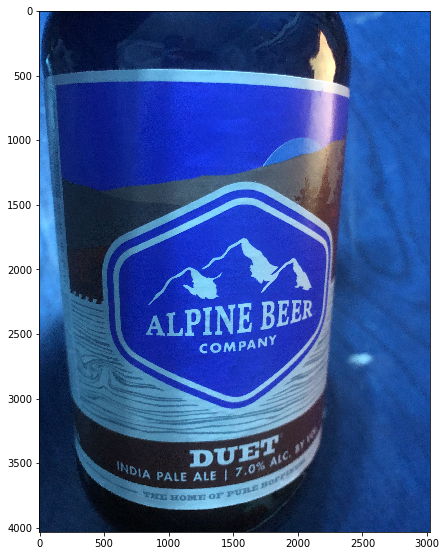

In [8]:
# import cv2 for image shaping
import cv2
# import urllib to read images from drive
import urllib
from google.colab.patches import cv2_imshow
# show sample image with opencv
im_path = df['images'].loc[0]
img = cv2.imread(im_path)
height, width, channels = img.shape
plt.figure(figsize=(7,10))
plt.imshow(img)
print('The image shape is {}'.format(img.shape))
print('Minimum RGB value in this image {}'.format(img.min()))
print('The aspect ratio of the image is {}'.format(width/height))

The first two dimensions of the image shape are the height and width, while the third is the number of channels for the image. The image has a height of 4032 and a width of 3024, the resolution on the iPhone 8, and 3 channels. A 3 channel image is color (one channel each for red, green and blue or RGB) and a 1 channel image is a black and white or gray image. 

The minimum RGB value for the image is 0, showing that the images can be resized to any dimension for modeling. Since the aspect ration is 0.75, this ratio will be maintained for any resized images. 

Since the images used in this report are taken in color (and the model should be tested on color images), the 3 channel images will be used. Below the blue, green, and red channels will be shown on the same image. The code for this display is borrowed from [Mohammed Innat.](https://www.kdnuggets.com/2018/07/basic-image-data-analysis-numpy-opencv-p1.html) 

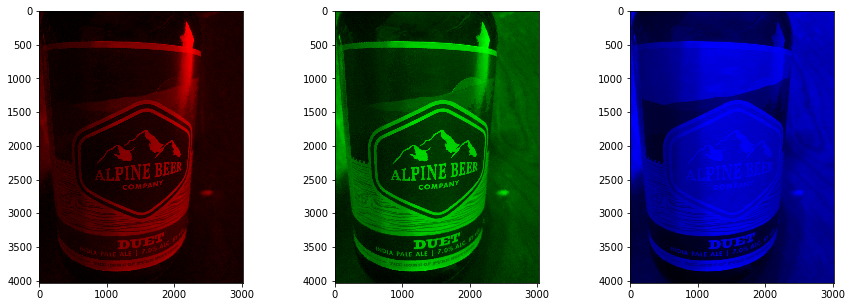

In [9]:
# show 3 pictures of same image, one for each color channel
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5)) 
for c,ax in zip(range(3),ax): 
    # create zero matrix
    split_img=np.zeros(img.shape,dtype="uint8")
    # assigning each channel 
    split_img[:,:,c]=img[:,:,c]
    # display each channel
    ax.imshow(split_img)

In the next section of the report all images will be converted to smaller images for the model. To show how the larger and smaller images differ, the image above will be converted to a (200, 150, 3) shape and shown.

The image shape is (200, 150, 3)
Minimum RGB value in this image 0
The aspect ratio of the image is 0.75


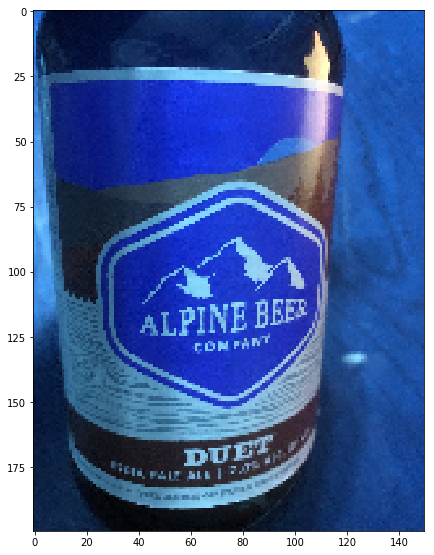

In [10]:
# define function to resize images
def resize_img(path):
    # read color photos
    im = cv2.imread(path)
    # resize images to save computational power and ensure same size across 
    ## all images while maintaining aspect ratio
    resized_img = cv2.resize(im, (150, 200))
    height, width, channels = resized_img.shape
    return resized_img
# resize image
r_img = resize_img(im_path)
plt.figure(figsize=(7,10))
plt.imshow(r_img)
print('The image shape is {}'.format(r_img.shape))
print('Minimum RGB value in this image {}'.format(r_img.min()))
print('The aspect ratio of the image is {}'.format(width/height))

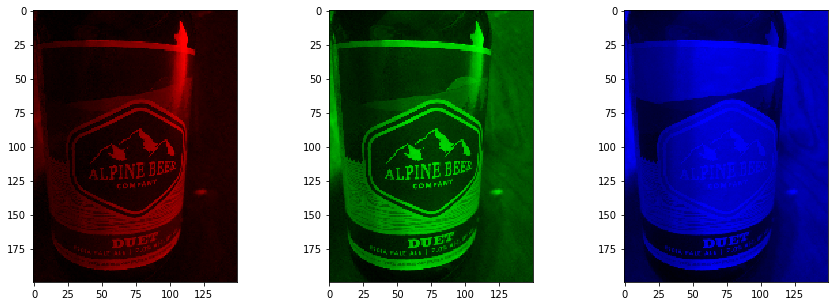

In [11]:
# show 3 pictures of same image, one for each color channel
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5)) 
for c,ax in zip(range(3),ax): 
    # create zero matrix
    split_img=np.zeros(r_img.shape,dtype="uint8")# 'dtype' by default: 'numpy.float64' 
    # assigning each channel 
    split_img[:,:,c]=r_img[:,:,c]
    # display each channel
    ax.imshow(split_img)

## Trackbar to Transform Images

Open CV has a [Trackbar tutorial](https://docs.opencv.org/3.4/da/d6a/tutorial_trackbar.html) to create a trackbar t o transform images:

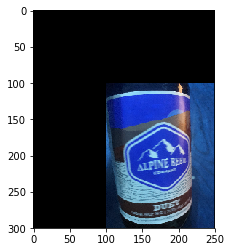

In [11]:
theta_degrees = 360 #@param {type:"slider", min:0, max:360, step:10}
shift_x = 100 #@param {type:"slider", min:-100, max:100, step:2}
shift_y = 100 #@param {type:"slider", min:-100, max:100, step:2}

# We can also play around with rotations by defining our M matrix, 
# which has the form:
"""
| cos(theta) -sin(theta) tx | 
| sin(theta)  cos(theta) ty |
"""

rows, cols, _ = r_img.shape

radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]

M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)

res = cv2.warpAffine(r_img, M, (cols,rows))

plt.imshow(res)
plt.show()

### Exploration with Hough Transform

The [Hough Transform](https://en.wikipedia.org/wiki/Hough_transform) is a feature extraction technique for images that identifies shapes, lines, etc. in images that are helpful in calssification.

Here the Probabalistic Hough Line Transform is used to explore different features of the original and resized sample image above. 

In [14]:
import math
# use cv2 to show probabalistic Hough transform of original image
# transform to gray for transform
og_img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# set edges
og_edges = cv2.Canny(og_img_grey,50,150,apertureSize = 3)
# set minimum line length and maximum line gap
minLineLength = 100
maxLineGap = 10
# get lines 
og_lines = cv2.HoughLinesP(og_edges, 1, np.pi/180, 25, 2,25,115)
# iterate through rho and theta values
for x1,y1,x2,y2 in og_lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imwrite('oghoughlines.jpg', img)

True

In [15]:
# use cv2 to show probabalistic Hough transform of resized image
# transform to gray for transform
r_img_grey = cv2.cvtColor(r_img, cv2.COLOR_BGR2GRAY)
# set edges
r_edges = cv2.Canny(r_img_grey,50,150,apertureSize = 3)
# set minimum line length and maximum line gap
minLineLength = 100
maxLineGap = 10
# get lines 
r_lines = cv2.HoughLinesP(r_edges, 1, np.pi/180, 25, 2,25,115)
# iterate through rho and theta values
for x1,y1,x2,y2 in r_lines[0]:
    cv2.line(r_img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imwrite('rhoughlines.jpg', r_img)

True

In [0]:
# declare image paths
# og_path = 'content/oghoughlines.jpg'
# r_path = 'content/rhoughlines.jpg'
# read images
# og_h_img = cv2.imread(og_path) 
# r_h_img = cv2.imread(r_path) 
# plot images
# plt.imshow(r_h_img)


# Convolutional Neural Network to Predict Beer by Label

A [convolutional neural network (CNN)](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5) from Keras (built on Tensorflow) will be used to classify the images. This model mutiplies the matrix values of an image with a kernel. This kernel acts like a magnifiying glass as a small neural network layer that lies on top of the larger image array layer. The smaller layer analzyes all pixels in the image array, much like a magnifying glass moving over a page.   

New arrays will be created from the generated images, the labels will be assigned, and then the test and training sets created. Before the model is created, how can the model output the name of the beer instead of a dummy variable or keras one-hot-encoding array?

In [16]:
# import tensorflow
import tensorflow as tf
# import keras
import keras
# import data generator
from keras import preprocessing
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# Import various componenets for model building
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.python.keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Dropout, BatchNormalization
from tensorflow.python.keras.optimizers import Adadelta
from tensorflow.python.keras.optimizers import RMSprop
# Import the backend
from tensorflow.python.keras import backend as K
# import callbacks and f1 score necessities
from tensorflow.python.keras.callbacks import Callback, ModelCheckpoint, TensorBoard 

Using TensorFlow backend.


## Prepare Data for Model

In order to properly label each category, the label for the test set will be converted to category codes and a dictionary pairing the numbers to the labels will be created. 

First, a column called 'cats' will be added to the dataframe. This will act as the response variable for the model.

In [0]:
# create test_labels list
cat_labels = df['labels'].astype('category').cat.codes
# concatenate back onto original dataframe
df = pd.concat([df, cat_labels], 1)
# rename concatenated column
df = df.rename(columns={0: 'cats'})
# convert cats columns to string for keras
df['cats'] = df['cats'].astype(str)

A dictionary will then be created from the cats column of the frame. This will allow the generators to be created with proper labeling that will match with the string name of each beer through the dictionary. 

In [18]:
# create dictionary for values in test_labels
dict_labels = dict( zip(df['cats'], df['labels']))
# create list of labels for cnn
model_labels = list(dict_labels.keys())
# show dictionary
dict_labels

{'0': 'allagash_white',
 '1': 'alpine_duet',
 '10': 'sierranevada_paleale',
 '11': 'stone_delicious',
 '2': 'aurora_hoppyalis',
 '3': 'ballastpoint_californiakolsch',
 '4': 'bearrepublic_racer5',
 '5': 'coronado_mermaidsred',
 '6': 'greenflash_westcoastipa',
 '7': 'lagunitas_secretagenda',
 '8': 'moderntimes_orderville',
 '9': 'pizzaport_swamisipa'}

To ensure all labels are in the training, test and validation sets (the training set will be 70% of the total data, test 15%, and the validation 15%), the sets will be created and the number of labels in each set shown. 

In [19]:
# create test, training, and validation sets
train = df[:4900]
test = df[4900:5450]
valid = df[5450:]
# show the number of labels in each set
print('There are {} labels in the training set'.format(len(train['cats'].unique())))
print('There are {} labels in the test set'.format(len(test['cats'].unique())))
print('There are {} labels in the validation set'.format(len(valid['cats'].unique())))

There are 12 labels in the training set
There are 12 labels in the test set
There are 12 labels in the validation set


Then a list of labels for each model set will be created.

In [0]:
# create labels for test, training and validation sets for random forest
train_labels = train['cats']
test_labels = test['cats']
valid_labels = valid['cats']

# Convolutional Neural Network to Predict Beer by Label

A [convolutional neural network (CNN)](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5) from Keras will be used to classify the images. This model mutiplies the matrix values of an image with a kernel. This kernel acts like a magnifiying glass as a small neural network layer that lies on top of the larger image array layer. The smaller layer analzyes all pixels in the image array, much like a magnifying glass moving over a page.   

New arrays will be created from the generated images, the labels will be assigned, and then the test and training sets created. Before the model is created, a checkpointer will be used to save the weights of the best performing models. 

In [0]:
# declare checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_categorical_accuracy',
                               verbose=1, 
                               save_best_only=True)

Now the model will be compiled. 

In [22]:
# declare number of classes 
num_classes = 12
# build the model
model = Sequential()
model.add(Conv2D(32, kernel_size = (20, 20), activation = 'relu', 
                 input_shape = (200, 150, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (10, 10), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (8, 8)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128, (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (8, 8)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation = 'softmax'))
# compile
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = Adadelta(),
              metrics = ['categorical_accuracy'])
# show summary
model.summary()

W0620 17:36:37.914065 139844346611584 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0620 17:36:38.479702 139844346611584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 181, 131, 32)      38432     
_________________________________________________________________
batch_normalization (BatchNo (None, 181, 131, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 122, 64)      204864    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 15, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 15, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 21, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 11, 128)       2

## Image Generation

The [Keras ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) is a powerful tool that allows the user to generate 'altered' images in order to create more data to train a machine learning model. The code used to create the generators and CNN model is borrowed from [Vijayabhaskar J.](https://medium.com/@vijayabhaskar96/multi-label-image-classification-tutorial-with-keras-imagedatagenerator-cd541f8eaf24) 

The target size of the image will be changed to (200, 150) as smaller images will allow the model to run faster while keeping the aspect ratio the same. The generator will also create altered images to train the model. First, the google dirve will be mounted to the notebook and the path to the original images declared. 

In [23]:
## declare batch size
batch_size = 32
# declare train and test datagens
## train datagen
datagen = ImageDataGenerator(rescale = 1. / 255., horizontal_flip = True, 
                             vertical_flip = False, width_shift_range = 0.2, 
                             height_shift_range = 0.2, zoom_range = 0.2, 
                             rotation_range = 10, shear_range = 0.2, 
                             fill_mode = 'nearest')
# test datagen
test_datagen=ImageDataGenerator(rescale = 1. / 255.)

# build train datagenerator 
train_generator = datagen.flow_from_dataframe(
dataframe = train,
directory = base_path,
x_col = 'images',
y_col = 'cats',
batch_size=batch_size,
seed = 42,
shuffle = True,
class_mode = 'categorical',
classes = model_labels,
target_size = (200, 150))

# build validation generator
valid_generator = test_datagen.flow_from_dataframe(
dataframe = valid,
directory = base_path,
x_col = 'images',
y_col = 'cats',
batch_size = batch_size,
seed = 42,
shuffle = True,
class_mode = 'categorical',
classes = model_labels,
target_size = (200, 150))

# build test generator
test_generator = test_datagen.flow_from_dataframe(
dataframe = test,
directory = base_path,
x_col = 'images',
batch_size = 1,
seed = 42,
shuffle = False,
class_mode = None,
target_size = (200, 150))

Found 4900 validated image filenames belonging to 12 classes.
Found 550 validated image filenames belonging to 12 classes.
Found 550 validated image filenames.


## Tensorboard

Tensorflow has a module called Tensorboard that allows for visualization of many aspects of a Keras model. The board will be declared below, and the visualizations shown later in the report. This tensorbaord code is taken from  [michaelscheinfeild](https://www.kaggle.com/ramajinka/visualize-network-with-tensorboard).

In [0]:
#tf.summary.scalar('CheckPoint',checkpointer)
Board = TensorBoard(log_dir='../output/logs', histogram_freq=0, 
                    write_graph=True, write_grads=False, write_images=True, 
                    embeddings_freq=0, embeddings_layer_names=None, 
                    embeddings_metadata=None, embeddings_data=None)

In [0]:
# size all generators and fit model
STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size
history = model.fit_generator(generator = train_generator,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_generator,
                    validation_steps = STEP_SIZE_VALID,
                    callbacks=[checkpointer],
                    epochs=10)

Epoch 1/10


W0620 17:36:57.893180 139844346611584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


102/153 [===================>..........] - ETA: 29:55 - loss: 1.6543 - categorical_accuracy: 0.4666

Keras allows models to be saved for later use:

In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("colab_model_twelvepack.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_twelvepack.h5")
print("Saved model to disk")

## CNN Model Analysis

In [0]:
# declare font dictionary so plots are easier to read
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
# apply dictionary to plots
plt.rc('font', **font)
# create frames for plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
# summarize history for categorical accuracy
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('CNN Model Accuracy')
ax1.set_ylabel('Categorical Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'test'], loc = 'lower right')
# summarize history for loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('CNN Model Categorical Cross Entropy Loss')
ax2.set_ylabel('Categorical Cross Entropy Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'test'], loc = 'upper right')
plt.show()